# Лекция 16. Scipy_1

1. **`scipy.integrate`**
    - интегрирование скалярных функций
    - **интегрирование ОДУ**
2. `scipy.interpolate`
3. `scipy.optimize`
4. ...

https://docs.scipy.org/doc/scipy/reference/

In [1]:
!pip install scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\stasb\Anaconda3\envs\p38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Интегрирование ОДУ

In [2]:
from scipy.integrate import ode, solve_ivp

## [Математический маятник](https://ru.wikipedia.org/wiki/Математический_маятник)

Уравнение движения:

$\ddot \theta + \frac{g}{L}\sin(\theta) = 0$

Без ограничения общности можно рассмотреть безразмерное уравнение:

$\ddot \theta + \sin(\theta) = 0$

ОДУ порядка 2 и более можно свести к системе ОДУ первого порядка:

$\dot \theta = \omega$

$\dot \omega = - \sin(\theta)$

Слева расположены первые производные, а справа - содержимое модели движения. Такое представление является стандартным, поэтому для анализа модели реализуют **правую часть** системы ОДУ как функцию.

In [3]:
from math import sin

def eq(t, s):
    '''
    Уравнения движения математического маятника
    
    Parameters
    ----------
    
    t: scalar
        time
        
    s: np.array
        вектор состояния [theta, omega]
        
    Return
    ------
    
    ds: np.array
        производная вектора состояния по времени
    '''
    ds = np.empty_like(s)
    theta, omega = s
    ds[0] = omega
    ds[1] = -sin(theta)
    return ds

### Задача Коши

Задача с начальными условиями, **i**nitial **v**alue **p**roblem

### Решение при помощи `solve_ivp`

In [39]:
t0 = 0
s0 = np.array([0, 0.1])
t1 = 2*np.pi

sol = solve_ivp(eq, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12  # абсолютная погрешность
               )

In [65]:
%%timeit
sol = solve_ivp(eq, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12  # абсолютная погрешность
               )

9.22 ms ± 316 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
sol.y.shape

(2, 65)

In [7]:
sol.t

array([0.        , 0.02476363, 0.12476363, 0.22476363, 0.32476363,
       0.42476363, 0.52476363, 0.62476363, 0.72476363, 0.82476363,
       0.92476363, 1.02476363, 1.12476363, 1.22476363, 1.32476363,
       1.42476363, 1.52476363, 1.62476363, 1.72476363, 1.82476363,
       1.92476363, 2.02476363, 2.12476363, 2.22476363, 2.32476363,
       2.42476363, 2.52476363, 2.62476363, 2.72476363, 2.82476363,
       2.92476363, 3.02476363, 3.12476363, 3.22476363, 3.32476363,
       3.42476363, 3.52476363, 3.62476363, 3.72476363, 3.82476363,
       3.92476363, 4.02476363, 4.12476363, 4.22476363, 4.32476363,
       4.42476363, 4.52476363, 4.62476363, 4.72476363, 4.82476363,
       4.92476363, 5.02476363, 5.12476363, 5.22476363, 5.32476363,
       5.42476363, 5.52476363, 5.62476363, 5.72476363, 5.82476363,
       5.92476363, 6.02476363, 6.12476363, 6.22476363, 6.28318531])

(-0.1100357086784088,
 0.10992977895705743,
 -0.10998145426541726,
 0.10999911686978178)

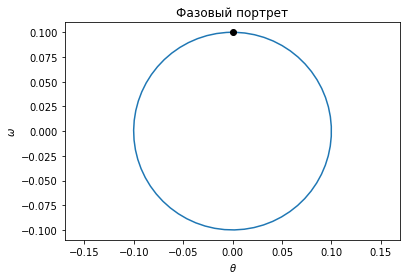

In [8]:
plt.plot(*sol.y)
plt.plot(*s0, 'ok')
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')

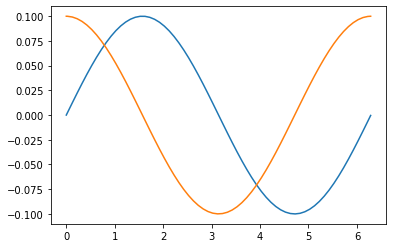

In [10]:
plt.plot(sol.t, sol.y[0]);
plt.plot(sol.t, sol.y[1]);

### Векторизованный вариант

In [13]:
def eqv(t, s):
    '''
    Уравнения движения математического маятника.
    Векторизованный вариант.
    
    Parameters
    ----------
    
    t: scalar
        time
        
    s: np.array (n*2,)
        вектор состояния [theta0, omega0, theta1, omega1, ...]
        
    Return
    ------
    
    ds: np.array
        производная вектора состояния по времени
    '''
    ds = np.empty_like(s)
    theta, omega = s[::2], s[1::2]
    ds[::2] = omega
    ds[1::2] = -np.sin(theta)
    return ds

In [14]:
t0 = 0
s0 = np.array([1, 0, 2, 0, np.pi-0.1, 0])
t1 = 2*np.pi

solv = solve_ivp(eqv, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12  # абсолютная погрешность
                )

In [15]:
solv.y.shape

(6, 65)

(-2.8213323571922646,
 3.320779558865129,
 -2.1802350918275093,
 1.8665188516741733)

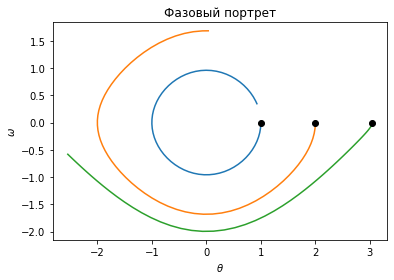

In [16]:
plt.plot(solv.y[::2].T, solv.y[1::2].T);
plt.plot(s0[::2], s0[1::2], 'ok')
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')

### Задание

Построить на одном рисунке фазовые портреты для 100 случайных начальных векторов состояния $s = (\theta, \omega)$ в квадрате [0, 1] x [1.5, 2.5]

(-3.0754247654469506, 14.73858956784597, -2.1769970838241, 2.7965177948664275)

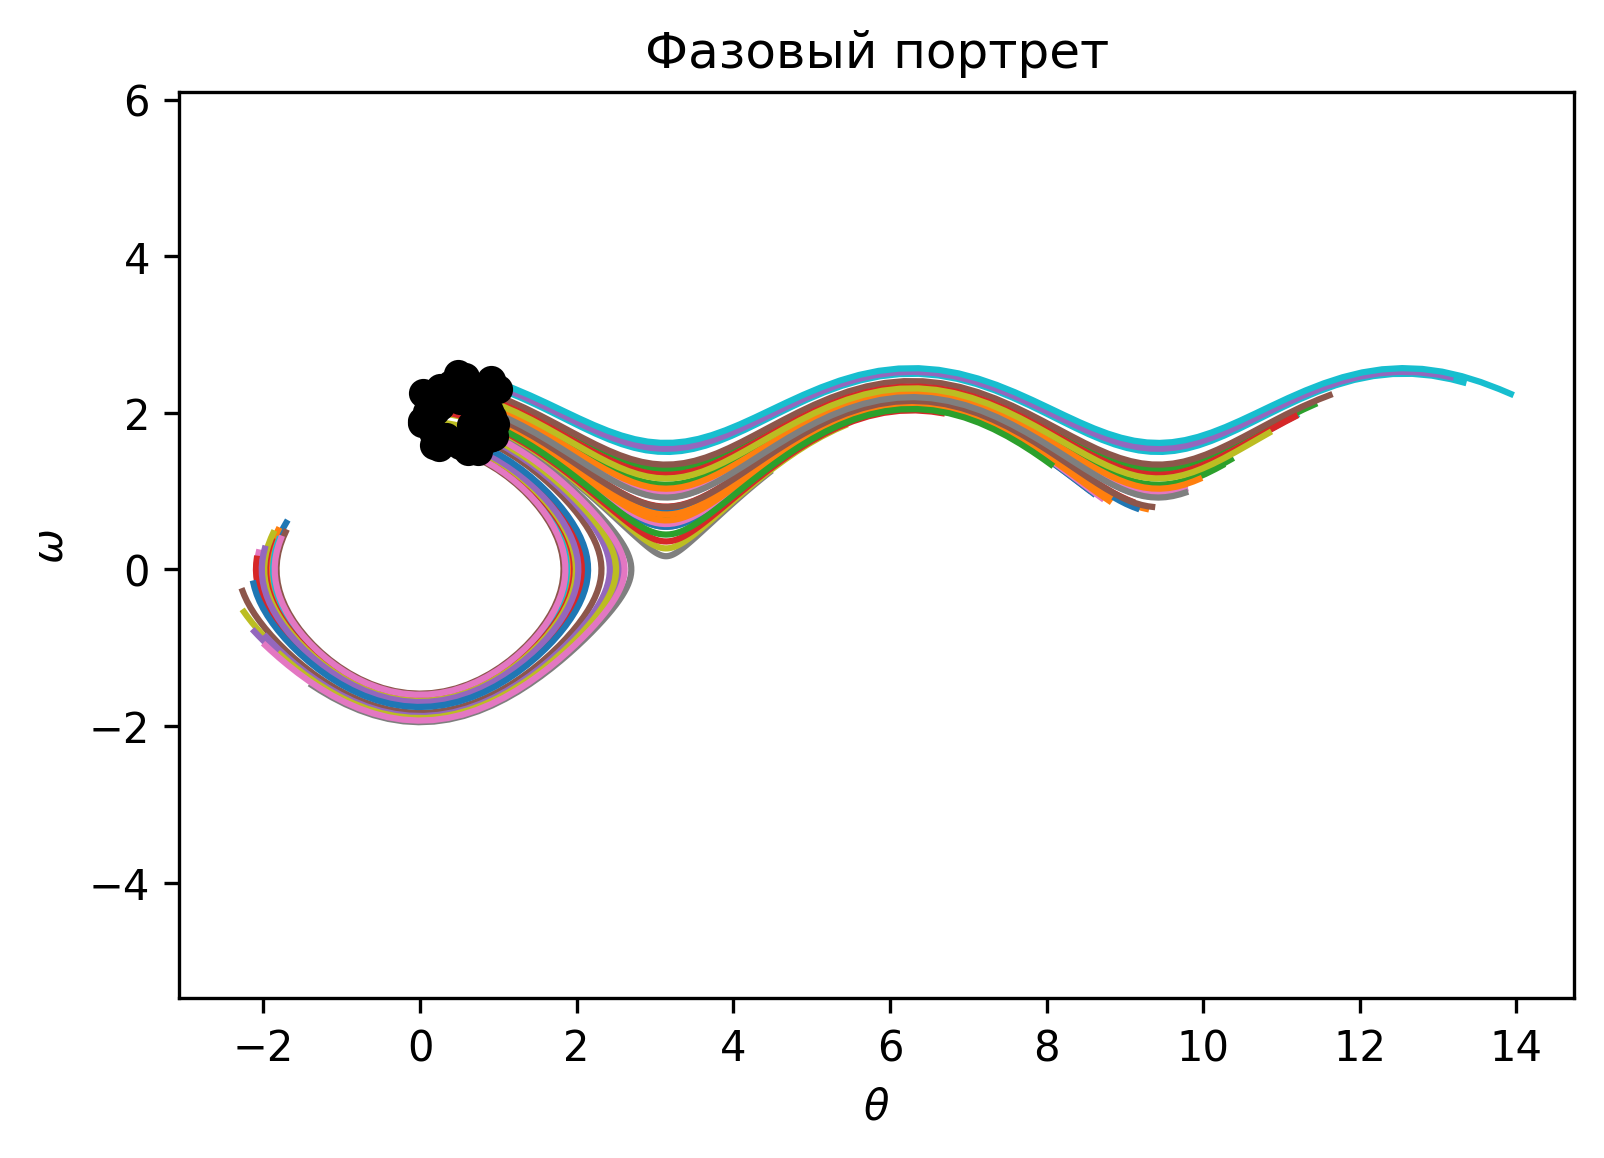

In [18]:
import random
t0 = 0
s0 = np.array([random.random() if i%2 == 0 else random.uniform(1.5, 2.5) for i in range(100)])
t1 = 2*np.pi

solv = solve_ivp(eqv, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12  # абсолютная погрешность
)
plt.figure(dpi=300)
plt.plot(solv.y[::2].T, solv.y[1::2].T);
plt.plot(s0[::2], s0[1::2], 'ok')
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')                 

### События `events`

In [20]:
# событийная функция должна обращаться в 0 при наступлении описываемого ей события
# корни этой функции будут вычислены с точностью интегрирования

def event(t, s):
    return s[0]

# терминальное событие позволит остановить интегрирование при его наступлении
event.terminal = True

# направление, в котором будет достигнут ноль событийной функции
# -1 означает, что функция пересекает ноль от положительных значений в отрицательные
event.direction = -1

In [21]:
t0 = 0
s0 = np.array([np.pi-0.000001, 0])
t1 = 100

sole = solve_ivp(eq, # правая часть СОДУ 
                [t0, t1],
                s0, # начальный вектор состояния
                method='DOP853', # метод численного интегрирования
                max_step=0.1, # максимальный шаг по времени
                rtol=1e-12, # относительная погрешность
                atol=1e-12,  # абсолютная погрешность
                events = [event],
               )

In [15]:
# рассчитанные моменты наступления событий
sole.t_events

[array([15.8949521])]

In [22]:
# период колебаний в данном случае можно рассчитать так
sole.t_events[0] * 4

array([63.5798084])

(-0.15707958267948913,
 3.2986712362692825,
 -2.0999999999993184,
 0.09999999999996755)

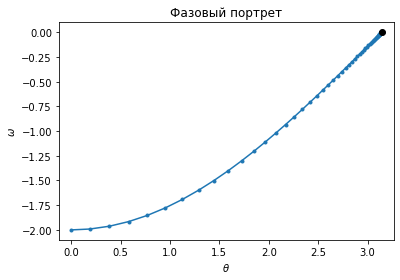

In [26]:
plt.plot(*sole.y, '.-');
plt.plot(*s0, 'ok')
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')

In [24]:
sole.t_events[0]/2*np.pi

array([24.96773237])

### Задание

Построить график зависимости периода колебаний маятника от начальной скорости $\omega$ в интервале (0, 2).

In [27]:
t0 = 0
t1 = 100

W = np.linspace(0, 2, 50)[1:-1]
T = []

for w in W:
    s0 = np.array([0., w])
    sole = solve_ivp(eq, # правая часть СОДУ 
                    [t0, t1],
                    s0, # начальный вектор состояния
                    method='DOP853', # метод численного интегрирования
                    max_step=0.1, # максимальный шаг по времени
                    rtol=1e-12, # относительная погрешность
                    atol=1e-12,  # абсолютная погрешность
                    events = [event],
                   )
    T.append(sole.t_events[0])
    
T = np.array(T)

In [33]:
W[-1]

1.9591836734693877

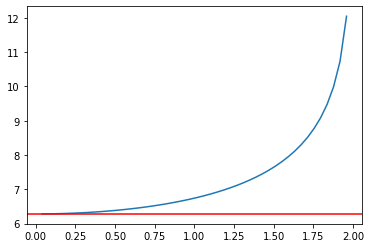

In [32]:
plt.plot(W, T*2);
plt.axhline(2*np.pi, color='r');

### Решение с использованием класса `ode`

In [61]:
from scipy.integrate import ode

In [62]:
integrator = ode(eq)
dt = 0.1
integrator.set_integrator('dop853', atol=1e-12, rtol=1e-12, max_step=dt)

In [63]:
t0 = 0
s0 = np.array([0, 0.1])
t1 = 2*np.pi

integrator.set_initial_value(s0, t0)

n = int((t1 - t0) / dt) + 1
dt = (t1 - t0) / n
states = np.empty((n+1, 2))
time = np.empty(n+1)

time[0] = t0
states[0] = s0
for i in range(n):
    time[i+1] = dt * (i + 1)
    states[i+1] = integrator.integrate(time[i+1])

In [64]:
%%timeit
integrator = ode(eq)
dt = 0.1
integrator.set_integrator('dop853', atol=1e-12, rtol=1e-12, max_step=dt)
integrator.set_initial_value(s0, t0)

n = int((t1 - t0) / dt) + 1
dt = (t1 - t0) / n
states = np.empty((n+1, 2))
time = np.empty(n+1)

time[0] = t0
states[0] = s0
for i in range(n):
    time[i+1] = dt * (i + 1)
    states[i+1] = integrator.integrate(time[i+1])

2.89 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


(-0.11000369072628695,
 0.11001386852396938,
 -0.10987956528338597,
 0.10999426501349457)

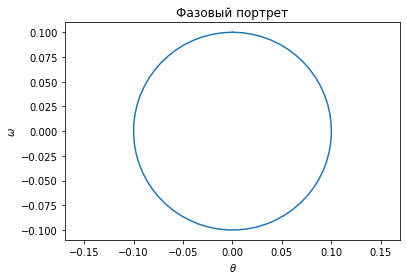

In [66]:
plt.plot(*states.T);
#plt.plot(*states[:1].T, 'ok');
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')

### Использование `solout` функции

In [102]:
t_lst = []
s_lst = []
def solout(t, s):
    print(t)
    t_lst.append(t)
    s_lst.append(s.copy())

In [68]:
t0 = 0
s0 = np.array([0, 0.1])
t1 = 2*np.pi

In [69]:
%%timeit
t_lst = []
s_lst = []
integrator = ode(eq)
dt = 0.1
integrator.set_integrator('dop853', atol=1e-12, rtol=1e-12, max_step=dt)
integrator.set_initial_value(s0, t0)
integrator.set_solout(solout)
integrator.integrate(t1)

2.41 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [70]:
t_lst = []
s_lst = []
integrator = ode(eq)
dt = 0.1
integrator.set_integrator('dop853', atol=1e-12, rtol=1e-12, max_step=dt)
integrator.set_initial_value(s0, t0)
integrator.set_solout(solout)
integrator.integrate(t1)

array([-0.00039325,  0.09999923])

(-0.11003643944241198,
 0.10992459328194926,
 -0.10997932455332148,
 0.10999901545492008)

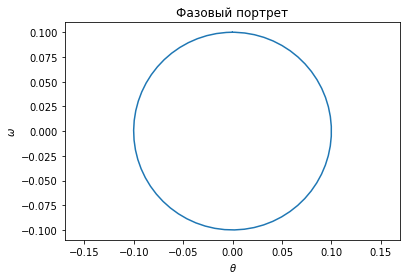

In [71]:
plt.plot(*np.array(s_lst).T);
#plt.plot(*states[:1].T, 'ok');
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')

### Задание

Построить на одном рисунке фазовые портреты для 100 случайных начальных векторов состояния $s = (\theta, \omega)$ в квадрате [0, 1] x [1.5, 2.5] используя **`solout`**

In [100]:
N = 100
rng = np.random.default_rng()
s0 = rng.uniform(size=(N*2))
s0[1::2] += 1.5

In [103]:
t_lst = []
s_lst = []
integrator = ode(eqv)
dt = 0.1
integrator.set_integrator('dop853', atol=1e-12, rtol=1e-12, max_step=dt)
integrator.set_initial_value(s0, t0)
integrator.set_solout(solout)
integrator.integrate(t1)

0.0
0.012745783163250455
0.08922048214275319
0.1892204821427532
0.2892204821427532
0.3892204821427532
0.48922048214275315
0.5892204821427531
0.6892204821427531
0.7892204821427531
0.8892204821427531
0.989220482142753
1.0892204821427531
1.1892204821427532
1.2892204821427533
1.3892204821427534
1.4892204821427535
1.5892204821427536
1.6892204821427537
1.7892204821427538
1.8892204821427538
1.989220482142754
2.089220482142754
2.189220482142754
2.289220482142754
2.389220482142754
2.489220482142754
2.5892204821427542
2.6892204821427543
2.7892204821427544
2.8892204821427545
2.9892204821427546
3.0892204821427547
3.1892204821427548
3.289220482142755
3.389220482142755
3.489220482142755
3.589220482142755
3.689220482142755
3.7892204821427553
3.8892204821427554
3.9892204821427555
4.089220482142755
4.189220482142755
4.289220482142754
4.389220482142754
4.489220482142754
4.589220482142753
4.689220482142753
4.789220482142753
4.889220482142752
4.989220482142752
5.089220482142752
5.189220482142751
5.2892204

array([-2.21396888, -0.14610887, 11.00004716,  1.86485966, 12.05223463,
        2.41570727, 11.85573125,  2.28047363, 10.09538496,  1.18601209,
       -2.21247993, -0.51131188, -1.81615674,  0.46588299, 11.11100372,
        1.92179457, -2.24162362, -0.54861862, -2.12113497, -0.09990719,
       -2.03897544, -0.81364233, -0.48039905, -1.91346785,  7.95549477,
        1.43215375, -2.17501706, -0.10513632, 13.24304913,  2.40593017,
       -1.9065387 ,  0.29135153,  6.50655617,  2.017798  , 12.338801  ,
        2.47358474, 13.22577369,  2.44571671, -1.60129687,  0.59334428,
        8.91383551,  0.89674102, -2.26288336, -0.07194288, 11.74321555,
        2.30876166, 11.52668283,  2.16618954, -2.21488309,  0.05502909,
        9.22180425,  0.78768159, -2.17934311, -0.50021531, 11.2808699 ,
        2.02197661, 11.52761967,  2.14547746, 12.68052901,  2.47326042,
       -1.74282263,  0.56489986, 13.31943523,  2.430883  , 10.51279015,
        1.57925069, 11.41720078,  2.13904193, -2.0183536 ,  0.24

In [108]:
s = np.array(s_lst).T
s.shape

(200, 65)

(-3.1018666761085814,
 15.355766278540106,
 -2.199748191038742,
 2.8662105116292396)

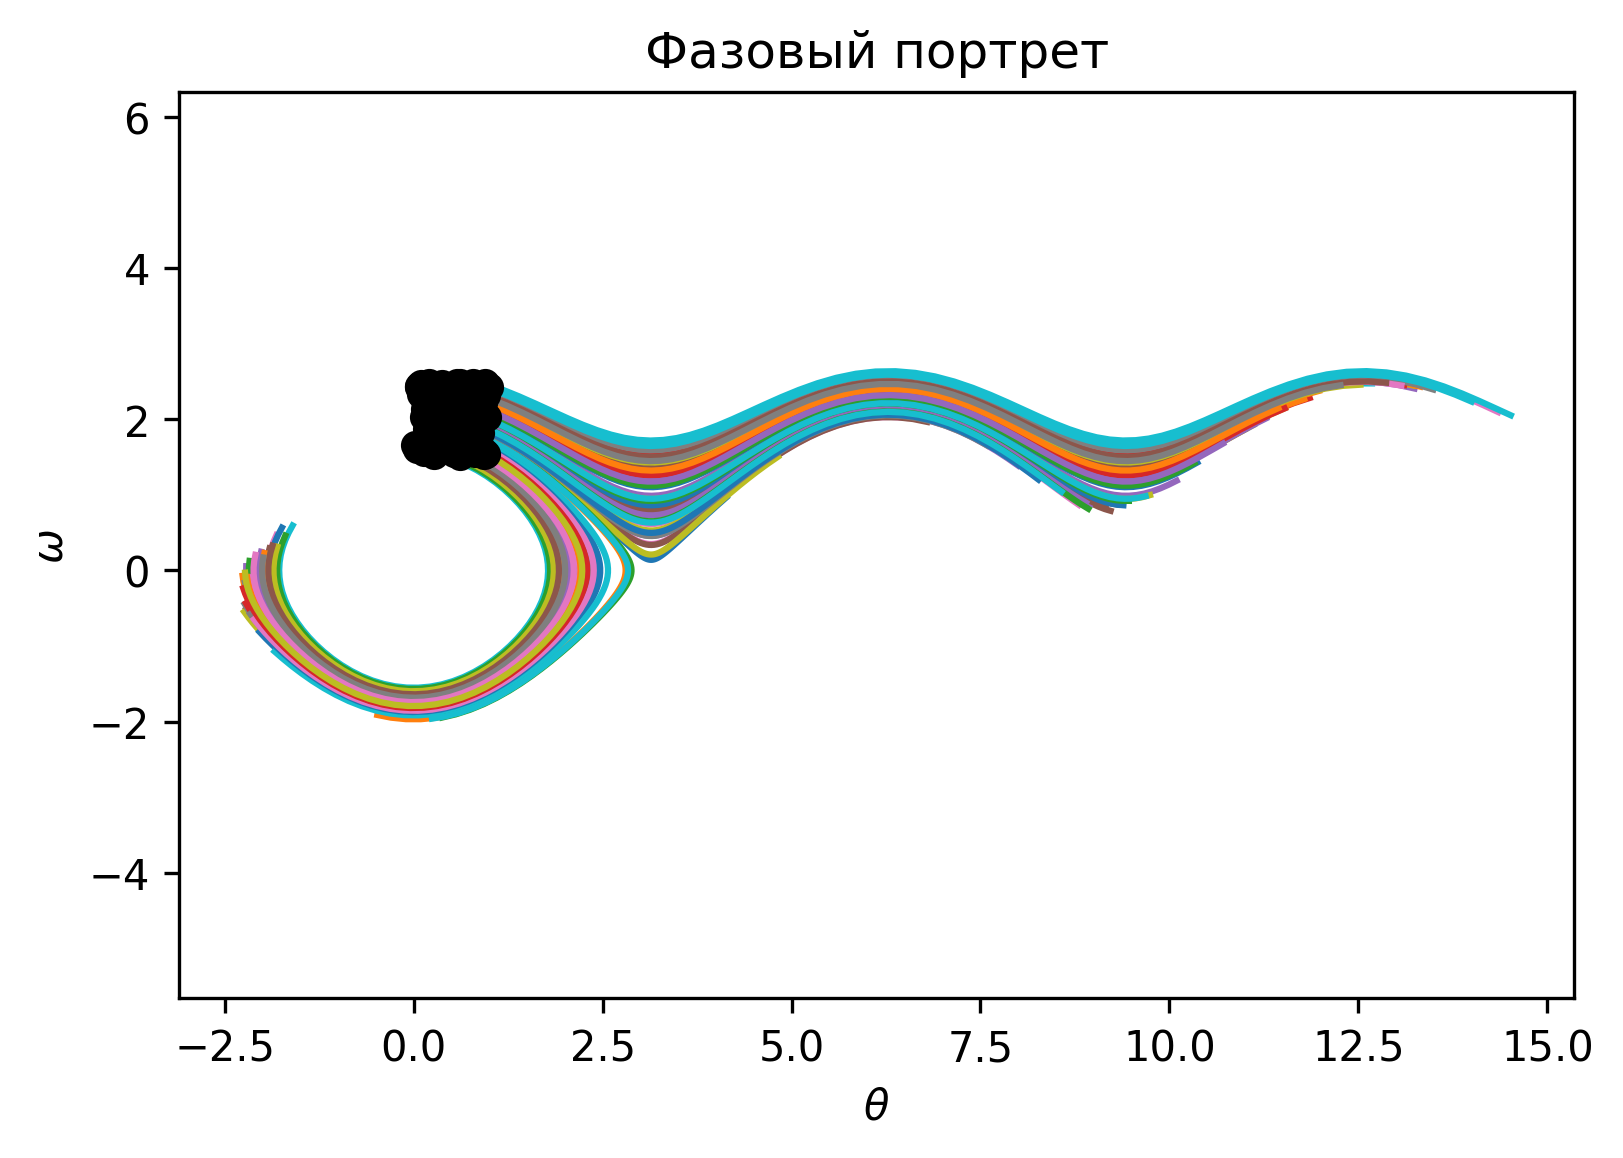

In [109]:
plt.figure(dpi=300)
plt.plot(s[::2].T, s[1::2].T);
plt.plot(s0[::2], s0[1::2], 'ok')
plt.title('Фазовый портрет')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\omega$')
plt.axis('equal')                 

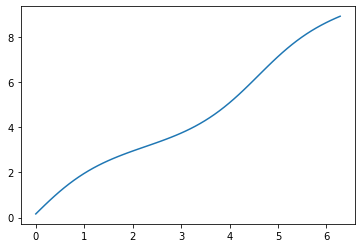

In [115]:
plt.plot(t_lst, s[40])